In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
from collections import Counter
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import tree
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')

## Veri Setini Okuma

In [2]:
#Veri setini okuma
data=pd.read_csv("C:/Users/tgbnr/Downloads/heart_failure_clinical_records.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
#Boş değerleri kontrol etme
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Aykırı Değer Analizi

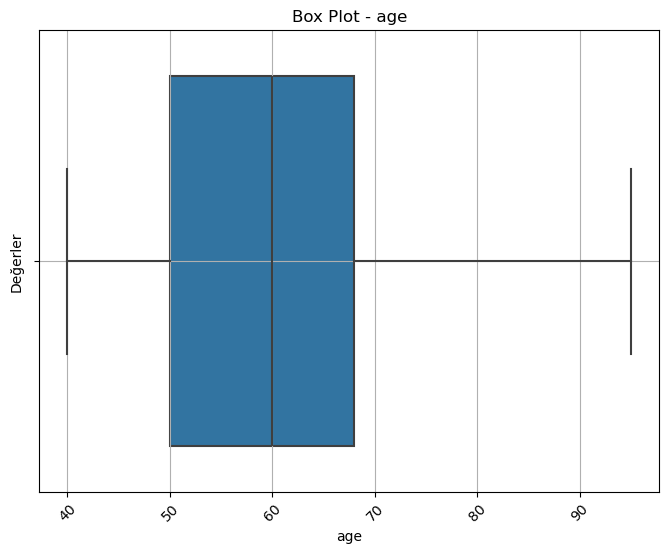

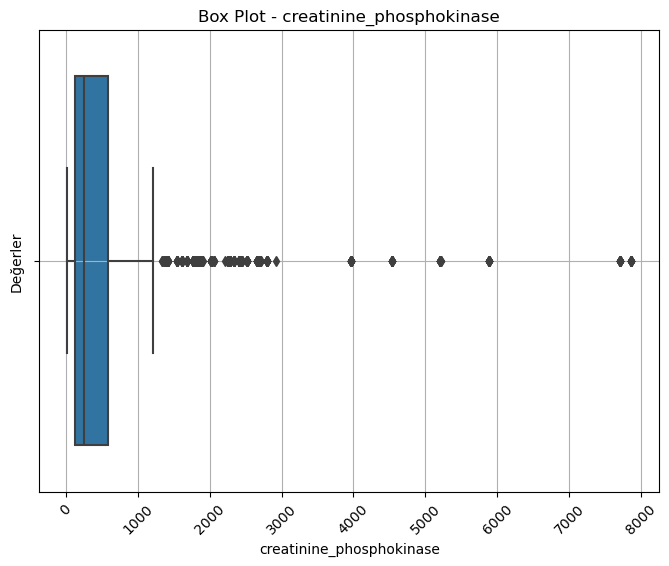

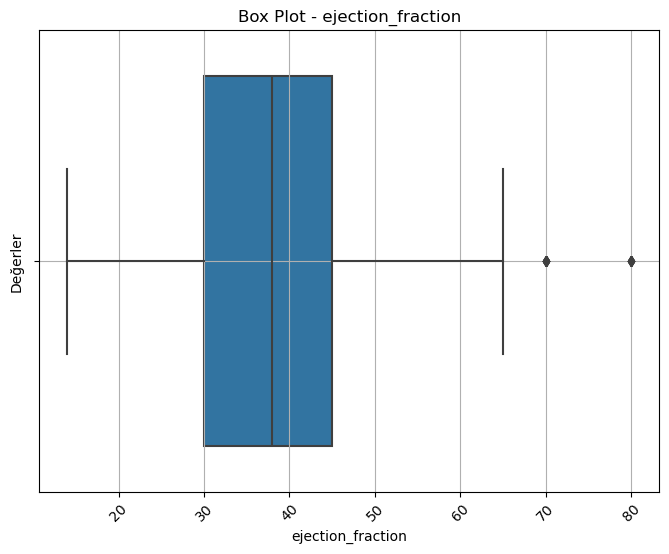

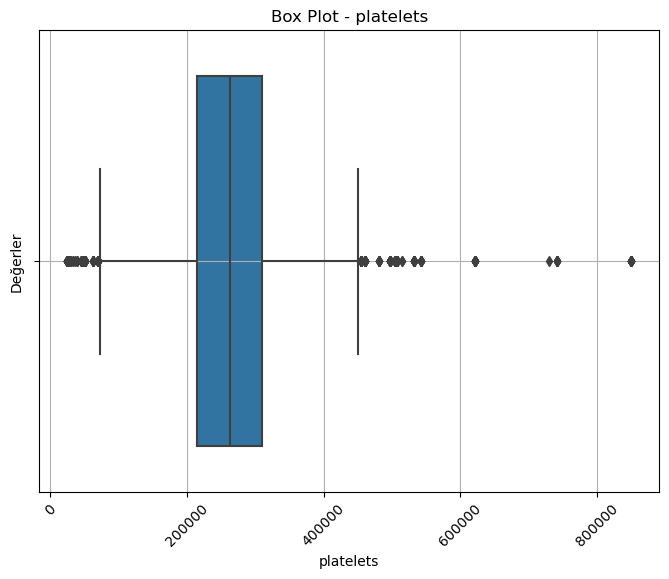

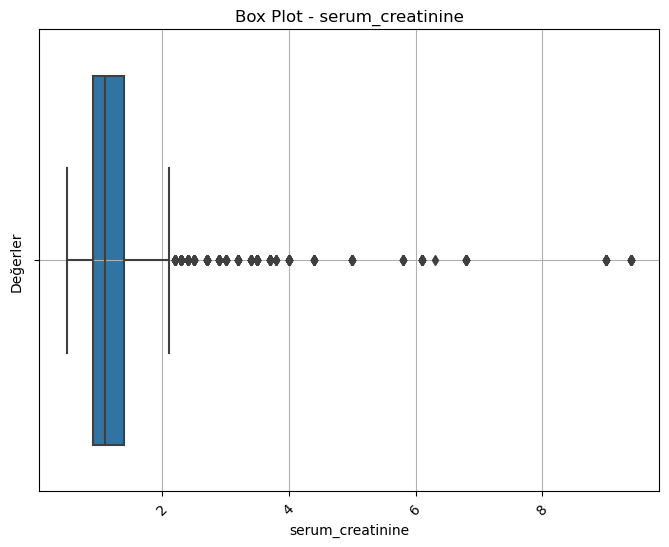

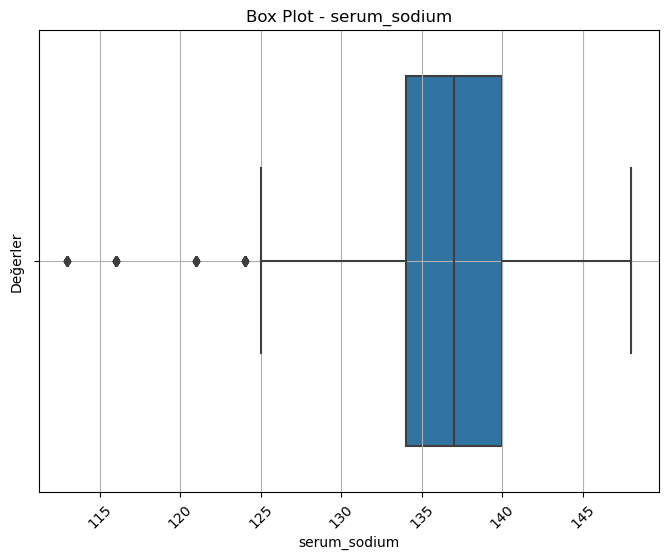

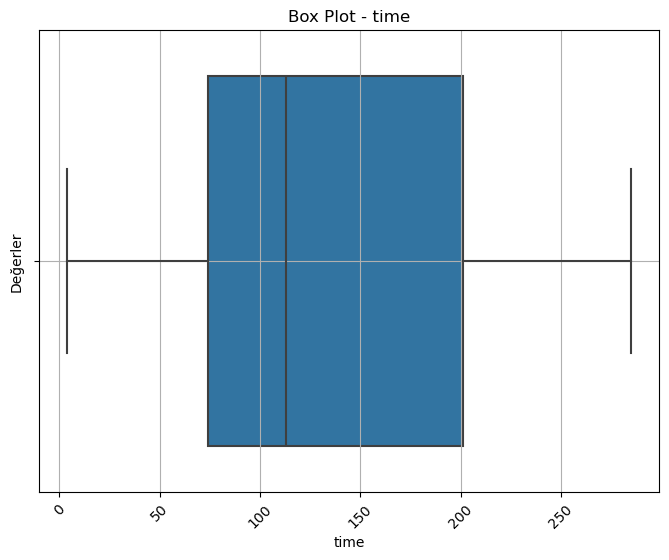

In [5]:
#Sayısal değerler için aykırı değer analizi
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
            'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for column in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot - {column}')
    plt.xlabel(column)
    plt.ylabel('Değerler')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [6]:
outlier_cols = ['creatinine_phosphokinase', 'ejection_fraction',
                'platelets', 'serum_creatinine', 'serum_sodium']
outlier_list = []

for i in outlier_cols:
    Q1 = data[i].quantile(0.25)
    Q3 =data[i].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    index_list = data[(data[i] < (Q1 - outlier_step)) | (data[i] > (Q3 + outlier_step))].index
    outlier_list.extend(index_list)
    
outlier_list = Counter(outlier_list)
outlier_list = list(outlier_list.items())
multi_outlier_indexes = [key for key, value in outlier_list if value > 1]

print(f"Aykırı değerlerin olduğu satırların sayısı: {len(outlier_list)}")
print(f"Birden fazla değişkende aykırı değere sahip satırların sayısı :{len(multi_outlier_indexes)}")

Aykırı değerlerin olduğu satırların sayısı: 1172
Birden fazla değişkende aykırı değere sahip satırların sayısı :148


In [7]:
#Aykırı değerlerin olduğu satırları silme işlemi
data.drop(multi_outlier_indexes, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

## Normalizasyon İşlemi

In [8]:
#Normalizasyon işlemi
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
data = pd.DataFrame(normalized_data, columns=data.columns)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.272727,0.0,0.092498,0.0,0.469697,0.0,0.288833,0.089888,0.685714,1.0,1.0,0.298932,0.0
1,0.454545,0.0,0.004210,0.0,0.166667,0.0,0.339314,0.505618,0.485714,1.0,0.0,0.722420,0.0
2,0.090909,0.0,0.071319,1.0,0.363636,0.0,0.356286,0.044944,0.771429,0.0,0.0,0.854093,0.0
3,0.363636,1.0,0.093264,1.0,0.393939,1.0,0.367196,0.078652,0.371429,1.0,0.0,0.306050,0.0
4,1.000000,1.0,0.071319,0.0,0.242424,0.0,0.528428,0.168539,0.542857,1.0,0.0,0.163701,1.0


In [9]:
#Hedef değişkeni ayrıştırma
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

### Özellik Seçim Yöntemi 3


## Mutual Information

In [14]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_info

array([0.13604179, 0.        , 0.34580614, 0.        , 0.10456934,
       0.00859222, 0.27393538, 0.17391484, 0.06817389, 0.00804386,
       0.        , 0.48846583])

In [17]:
mutual_info=pd.Series(mutual_info)
mutual_info.index= X.columns
mutual_info.sort_values(ascending=False)

time                        0.488466
creatinine_phosphokinase    0.345806
platelets                   0.273935
serum_creatinine            0.173915
age                         0.136042
ejection_fraction           0.104569
serum_sodium                0.068174
high_blood_pressure         0.008592
sex                         0.008044
anaemia                     0.000000
diabetes                    0.000000
smoking                     0.000000
dtype: float64

<Axes: >

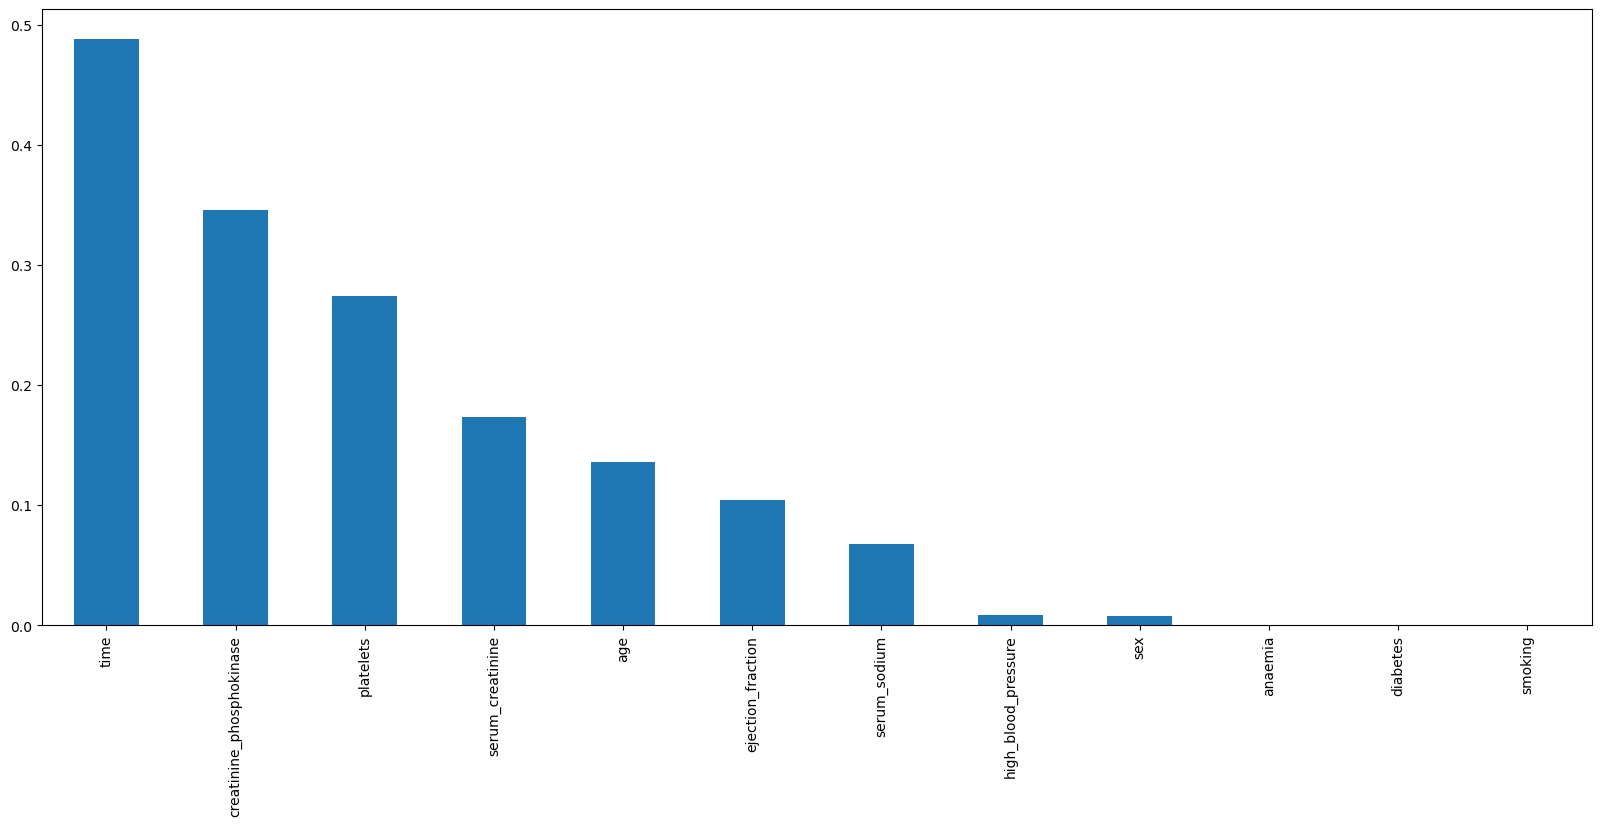

In [18]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [23]:
sel_ten_cols= SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(X.fillna(0), y)
X.columns[sel_ten_cols.get_support()]

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'time'],
      dtype='object')

In [31]:
X.drop(X.columns[~sel_ten_cols.get_support()], axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,time
0,0.272727,0.0,0.092498,0.0,0.469697,0.288833,0.089888,0.685714,1.0,0.298932
1,0.454545,0.0,0.004210,0.0,0.166667,0.339314,0.505618,0.485714,1.0,0.722420
2,0.090909,0.0,0.071319,1.0,0.363636,0.356286,0.044944,0.771429,0.0,0.854093
3,0.363636,1.0,0.093264,1.0,0.393939,0.367196,0.078652,0.371429,1.0,0.306050
4,1.000000,1.0,0.071319,0.0,0.242424,0.528428,0.168539,0.542857,1.0,0.163701
...,...,...,...,...,...,...,...,...,...,...
4847,0.363636,1.0,0.071319,0.0,0.242424,0.123530,0.044944,0.914286,0.0,0.323843
4848,0.090909,0.0,0.071319,1.0,0.621212,0.627834,0.056180,0.542857,0.0,0.875445
4849,0.363636,1.0,0.071319,0.0,0.242424,0.123530,0.044944,0.914286,0.0,0.323843
4850,1.000000,1.0,0.011355,0.0,0.393939,0.207177,0.056180,0.714286,0.0,0.071174


## Veri setini Eğitim ve Test setlerine ayırma

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Makine Öğrenim Yöntemi 3

## Decision Tree

In [47]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Model olusturma
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[11] <= 0.226\nentropy = 0.886\nsamples = 3396\nvalue = [2365, 1031]'),
 Text(0.25, 0.625, 'x[0] <= 0.482\nentropy = 0.5\nsamples = 727\nvalue = [80, 647]'),
 Text(0.125, 0.375, 'x[7] <= 0.096\nentropy = 0.683\nsamples = 414\nvalue = [75, 339]'),
 Text(0.0625, 0.125, 'entropy = 0.853\nsamples = 259\nvalue = [72, 187]'),
 Text(0.1875, 0.125, 'entropy = 0.138\nsamples = 155\nvalue = [3, 152]'),
 Text(0.375, 0.375, 'x[11] <= 0.1\nentropy = 0.118\nsamples = 313\nvalue = [5, 308]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 233\nvalue = [0, 233]'),
 Text(0.4375, 0.125, 'entropy = 0.337\nsamples = 80\nvalue = [5, 75]'),
 Text(0.75, 0.625, 'x[4] <= 0.28\nentropy = 0.594\nsamples = 2669\nvalue = [2285, 384]'),
 Text(0.625, 0.375, 'x[7] <= 0.096\nentropy = 0.949\nsamples = 741\nvalue = [468, 273]'),
 Text(0.5625, 0.125, 'entropy = 0.724\nsamples = 477\nvalue = [381, 96]'),
 Text(0.6875, 0.125, 'entropy = 0.914\nsamples = 264\nvalue = [87, 177]'),
 Text(0.875, 0.375, 'x[

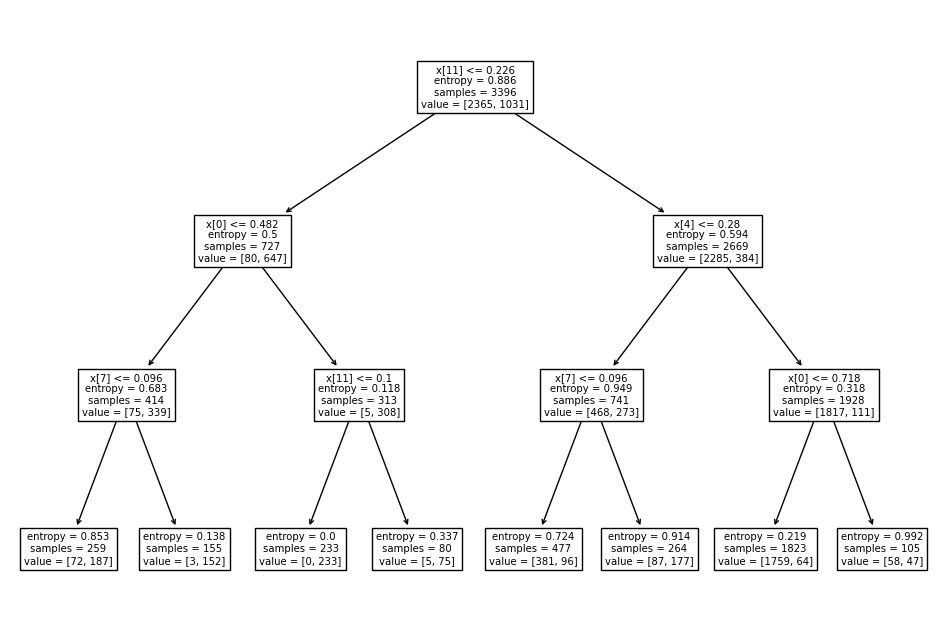

In [48]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [59]:
y_pred_en = clf_en.predict(X_test)

In [60]:
y_pred_train_en = clf_en.predict(X_train)

In [61]:
print('Entropy kriteriyle model doğruluk skoru: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Eğitim seti doğruluk skoru: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Entropy kriteriyle model doğruluk skoru: 0.8908
Eğitim seti doğruluk skoru: 0.8899


## Karışıklık Matrisi

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred_en)
print('Karışıklık Matrisi\n\n', cm)

Karışıklık Matrisi

 [[936  68]
 [ 91 361]]


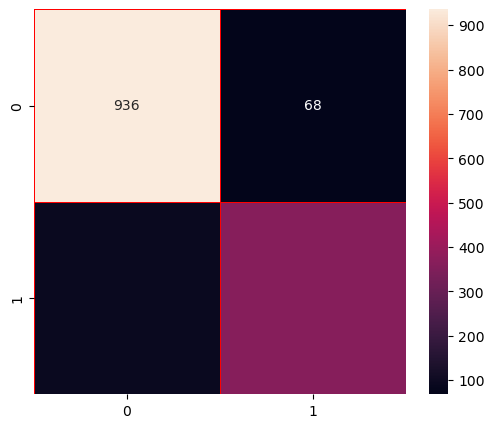

<Figure size 640x480 with 0 Axes>

In [70]:
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

## Model Değerlendirme

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
# Sınıflandırma raporunu yazdırma
accuracy = accuracy_score(y_test, y_pred_en)
precision = precision_score(y_test, y_pred_en)
recall = recall_score(y_test, y_pred_en)
f1 = f1_score(y_test, y_pred_en)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8908
Precision: 0.8415
Recall: 0.7987
F1 Score: 0.8195


In [75]:
# Sınıflandırma raporu
print("Modelin Sınıflandırma Raporu:\n")
classification_rep = classification_report(y_test, y_pred_en, output_dict=True)
print(classification_report(y_test, y_pred_en))

Modelin Sınıflandırma Raporu:

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      1004
         1.0       0.84      0.80      0.82       452

    accuracy                           0.89      1456
   macro avg       0.88      0.87      0.87      1456
weighted avg       0.89      0.89      0.89      1456

